# Метод Монте-Карло в физике

Методом Монте-Карло называют целую множество различных метоедов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
rndm = np.random.RandomState(12345)
import random



## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
(10% от общей оценки)

Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)} R^d
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекурентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    return np.pi**(D/2)/sp.gamma(1+D/2)*R**(D)

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

2.0
3.141592653589793
4.188790204786391


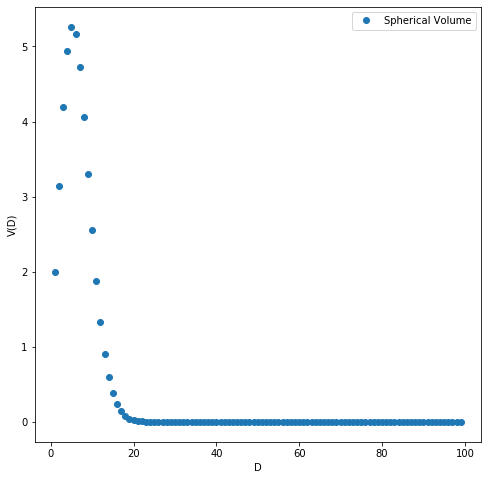

In [6]:
for j in range (1,4):
    print(getSphereVolumeExact(j))


vol = np.array([])
for k in range(1,100): 
    vol = np.append(vol, getSphereVolumeExact(k))

x_ = np.linspace(1,99,99)
plt.figure(figsize=(8,8))
plt.plot(x_,vol,'o',label='Spherical Volume')
plt.xlabel('D')
plt.ylabel('V(D)')
plt.legend()


### Задание 1.2
(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [3]:
def inside(x, r):
    n = 0
    for i in range (0,x.shape[1]):
        if np.sum((x**2)[:,i])< r**2:
            n +=1
    return n


def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    x = rndm.uniform(low= -R, high= R, size=(D, N))
    m = inside(x, R)
    V = m/N * (2*R)**D
    return V

Постройте график зависимости числа узлов $N$ при котором достигается относительная точность порядка $10^{-2}$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$. Для нахождения соответствующего $N$ используйте алгоритм удвоения $N$, который вы использовали для оценки точности интегралов в 6-ой домашней работе.

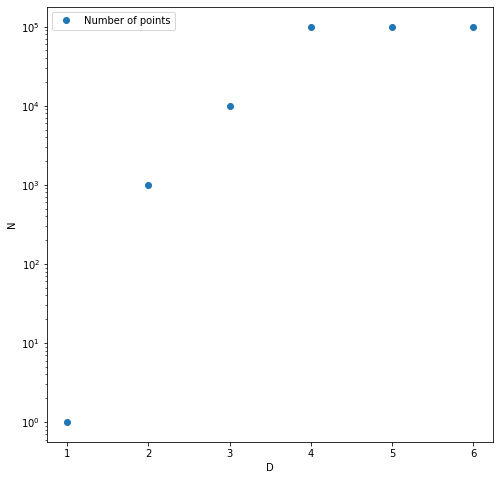

In [5]:
def find_N(D,eps):
    N = 1 
    V0 = getSphereVolumeExact(D,R=1)
    while True:
        V = getSphereVolumePseudorandom(N,D,R=1)
        if np.abs((V0-V)/V0) < eps:
            break
        N *= 10
    return N

x_arr = np.linspace(1,6,6)
Num = np.array([])
for j in range(1,7):
    Num = np.append(Num,find_N(j,1e-2))
plt.figure(figsize=(8,8))
plt.plot(x_arr,Num,'o',label = 'Number of points Pseudo')
plt.xlabel('D')
plt.ylabel('N')
plt.yscale('log')
plt.legend()

### Задание 1.3

(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq` выполните команду 
`pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [5]:
!pip install sobol_seq
import sobol_seq 
 

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [6]:
sobol_seq.i4_sobol_generate?

Signature: sobol_seq.i4_sobol_generate(dim_num, n, skip=0)
Docstring:
i4_sobol_generate generates a Sobol dataset.

Parameters:
  Input, integer dim_num, the spatial dimension.
  Input, integer N, the number of points to generate.
  Input, integer SKIP, the number of initial points to skip.

  Output, real R(M,N), the points.
File:      ~/anaconda3/lib/python3.7/site-packages/sobol_seq/sobol_seq.py
Type:      function


In [36]:
def inside1(x, r):
    n = 0
    for i in range (0,x.shape[0]):
        if np.sum((x**2)[i,:])< r**2:
            n +=1
    return n

def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    x = sobol_seq.i4_sobol_generate(D,N)
    m = inside1(x, R)
    V = m/N * (2*R)**D
    return V

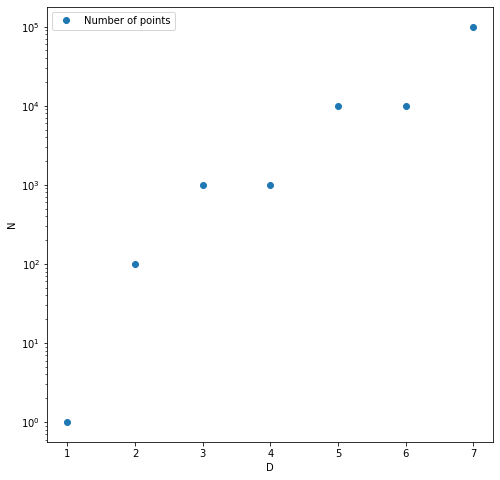

In [38]:
def find_N1(D,eps):
    N = 1 
    V0 = getSphereVolumeExact(D,R=1)
    while True:
        V = getSphereVolumeQuasirandom(N,D,R=1)
        if np.abs((V0-V)/V0) < eps:
            break
        N *= 10
    return N

x_arr = np.linspace(1,7,7)
Num = np.array([])
for j in range(1,8):
    Num = np.append(Num,find_N1(j,1e-2))
plt.figure(figsize=(8,8))
plt.plot(x_arr,Num,'o',label = 'Number of points Quasirandom')
plt.xlabel('D')
plt.ylabel('N')
plt.yscale('log')
plt.legend()

Сравните точность вчисления объема для квазислучайной погрешности, построив такой же график $N(D)$ при которых достигается точность $10^{-8}$, как для псевдослучайных чисел.

***

Сделайте выводы об эффективности квазислучайных последовательностей. 

## How we can see: 
1) Sobol quasirandom sequences need much less time than classical Monte-Carlo
2) Sobol needs less points to achieve the same accuracy

## Задание 2

(50% от общей оценки)

Рассмотрим решетку $n\times n$ в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние когда все спины одинаково ориентированы. Однако при ненлевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблемотичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [101]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = rndm.choice([-1,1],size=(N,N))
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [311]:
def getEnergyone(i,j,state): #рассчет энергии одной ячейки с тороидальными краевыми условиями
    E = 100000
    if i+1 > state.shape[0]-1 and j+1>state.shape[1]-1:
        E = state[i,j]*(state[0,j]+state[i,0]+state[i,j-1]+state[i-1,j])
    elif i+1 > state.shape[0]-1 and j+1<=state.shape[1]-1 and j-1>=0:
        E = state[i,j]*(state[0,j]+state[i,j+1]+state[i,j-1]+state[i-1,j])
    elif i+1 > state.shape[0]-1  and j-1<0:
        E = state[i,j]*(state[0,j]+state[i,j+1]+state[i,state.shape[1]-1]+state[i-1,j])
    elif j+1 > state.shape[0]-1  and i-1<0:
        E = state[i,j]*(state[i+1,j]+state[i,0]+state[i,j-1]+state[state.shape[1]-1,j])
    elif i+1 <= state.shape[0]-1 and j+1>state.shape[1]-1 and i-1 >= 0:
        E = state[i,j]*(state[i+1,j]+state[i,0]+state[i,j-1]+state[i-1,j])
    elif i-1 < 0 and j-1<0:
        E = state[i,j]*(state[i+1,j]+state[i,j+1]+state[i,state.shape[1]-1]+state[state.shape[1]-1,j])
    elif i-1 < 0 and j-1>=0 and j+1<=state.shape[1]-1:
        E = state[i,j]*(state[i+1,j]+state[i,j+1]+state[i,j-1]+state[state.shape[1]-1,j])
    elif i-1 >= 0 and j-1<0 and i+1 <= state.shape[0]-1:
        E = state[i,j]*(state[i+1,j]+state[i,j+1]+state[i,state.shape[1]-1]+state[i-1,j])
    elif i+1 <= state.shape[0]-1 and j+1<=state.shape[1]-1 and i-1 >= 0 and j-1>=0:
        E = state[i,j]*(state[i+1,j]+state[i,j+1]+state[i,j-1]+state[i-1,j])
    else:
        print(E,i,j,state.shape[0])
    return -E

def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    E1 = getEnergyone(i,j,state)
    dE = -getEnergyone(i,j,state) - E1
    return dE
    

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. Можете использовать как псевдослучайную, так и квазислучайную последовательность, на ваш выбор. 

Обратите внимание, что если вам нужно сгенерировать большое количество случайных чисел и далее использовать их в цикле, то быстрее будет за один раз сгенерировать нужное количество случайных чисел и потом использовать их, чем генерировать их по одному в цикле. 

In [343]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    x,y = rndm.randint(low= 0, high= state.shape[0], size=(2, (state.shape[0]-1)**2))
    for i in range((state.shape[0]-1)**2):
        dE = getDeltaE(x[i],y[i],state)
        if dE > 0 and rndm.random() > np.exp(-dE/T) :
            continue
        state[x[i],y[i]] = -state[x[i],y[i]]
    return state

def makeFlip1(T, state): 
    nn = state.shape[0]-1 
    i_ar, j_ar = rndm.randint(low=0, high=nn+1, size=(2,nn**2)) 
    uni_ar = rndm.uniform(0,1,size=nn**2) 
    for a in range(nn**2): 
        de = getDeltaE(i_ar[a], j_ar[a], state) 
        if de>0 and uni_ar[a]>np.exp(-de/T): 
            continue 
        state[i_ar[a],j_ar[a]] = -state[i_ar[a],j_ar[a]] 
    return state


4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [312]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E =0 
    for i in range(0,state.shape[0]):
        for j in range(0,state.shape[0]):
            E+= getEnergyone(i,j,state)
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [313]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

Далее задаются начальные параметры: 
**Nt** - количество точек по температуре, 
**N** - линейный размер решетки, 
**eqStep** - количество попыток переворота спина в течение которых система приводится к равновесному сосотоянию, обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,
**steps** - количество попыток переворота спина в течение на которых рассчитывается значения энергии и намагниченности, нужно для усреднения случайных значений

Подберите наибольшие значения этих параметров таким образом, что бы ваша программа выполнялась выполнялась за разумно короткое время 

In [349]:
N       = 30       # размер решетки NxN
Nt      = 50         # количество точек температуры
eqSteps = 500  # количество раз выполнения makeFlip для установления равновесия
steps   = 350        # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(1, 6., Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

Далее представлен основной блок программы, соединяющий всё написанное выше в одно целое. Здесь, в цикле по точкам температуры, задается случайное начальное состояние, приводится к равновесному, и далее вычисляется средние значения энергии и намагниченности, и строится их график.

Complete 0.0 %Complete 2.0 %Complete 4.0 %Complete 6.0 %Complete 8.0 %Complete 10.0 %Complete 12.0 %Complete 14.000000000000002 %Complete 16.0 %Complete 18.0 %Complete 20.0 %Complete 22.0 %Complete 24.0 %Complete 26.0 %Complete 28.000000000000004 %Complete 30.0 %Complete 32.0 %Complete 34.0 %Complete 36.0 %Complete 38.0 %Complete 40.0 %Complete 42.0 %Complete 44.0 %Complete 46.0 %Complete 48.0 %Complete 50.0 %Complete 52.0 %Complete 54.0 %Complete 56.00000000000001 %Complete 57.99999999999999 %Complete 60.0 %Complete 62.0 %Complete 64.0 %Complete 66.0 %Complete 68.0 %Complete 70.0 %Complete 72.0 %Complete 74.0 %Complete 76.0 %Complete 78.0 %Complete 80.0 %Complete 82.0 %Complete 84.0 %Complete 86.0 %Complete 88.0 %Complete 90.0 %Complete 92.0 %Complete 94.0 %Complete 96.0 %Complete 98.0 %Done

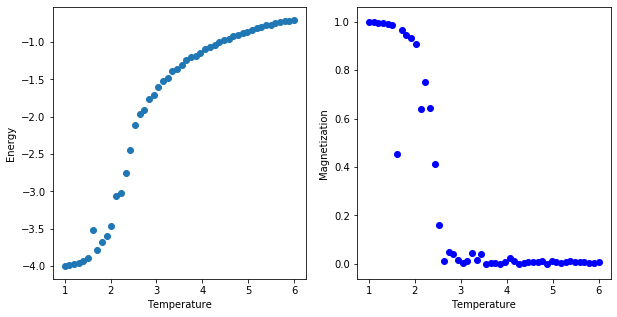

In [350]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    state_st = state.copy()
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          
    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5))

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature");
ax[1].set_ylabel("Magnetization ");

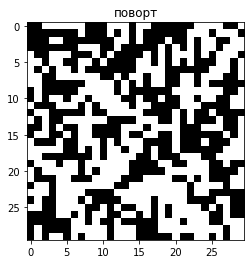

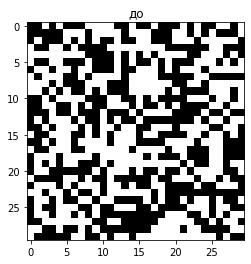

In [351]:
plt.imshow(state, cmap="binary") 
plt.title("поворт") 
plt.show()
plt.imshow(state_st, cmap="binary") 
plt.title("до") 
plt.show()

Интерпретируйте с точки зрения физики полученные графики. Описыввают ли они поведение феромагнетиков и фазовые переходы?

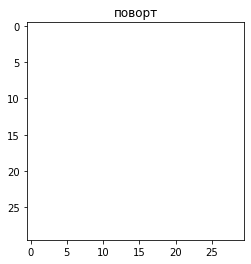

In [348]:
state1 = getInitialState(30)
for l in range(500):
    state1 = makeFlip(0.0005,state1)
plt.imshow(state1, cmap="binary") 
plt.title("поворт") 
plt.show()

Дополнительно. Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое. 

In [ ]:
N = 64
state = getInitialState(N)

In [71]:
plt.figure()
makeFlip(0.5, state)


<Figure size 432x288 with 0 Axes>

In [ ]:
# Write your answer here